In [ ]:
import csv

input_file = 'Crime_rate_1960-2019.csv'
output_file = 'clean_Crime_rate_1960-2019.csv'

with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    for row in reader:
        # Remove commas from each element in the row
        row_without_commas = [element.replace(',', '') for element in row]
        row_without_commas = [element.replace('*', '') for element in row_without_commas]
        # Remove column 1,2
        del row_without_commas[1:3]
        writer.writerow(row_without_commas)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

monthly_inflation_rates = pd.read_csv('US_inflation_rates.csv')

In [5]:
# the following code computes the weighted annual inflation rate and filters years

years = []
inflations = []
inflation_array = []
previous = 0.0
not_found = True
cur_year = ''
cycle = False
for x in monthly_inflation_rates.values:
  if not_found:
    date = x[0]
    if date.startswith('1959-12-01'):
      not_found = False
    else:
      continue
  else:
    date = x[0]
    if cur_year == '':
      if cycle:
        cur_infl = x[1]
        infl = (cur_infl-previous)/previous
        inflation_array.append(infl)
        # previous = cur_infl
        np_array = np.array(inflation_array)
        inflation_array = []
        sum = np_array.sum()
        inflations.append(sum)
      cur_year = date[:4]
      if cur_year.startswith('2020'):
        break
      previous = x[1]
      Y = int(cur_year)
      years.append(Y)
    else:
      cur_infl = x[1]
      infl = (cur_infl-previous)/previous
      infl*=100
      # rounded = round(infl, 3)
      inflation_array.append(infl)
      previous = cur_infl
      if date[5:7]=='12':
        cur_year = ''
        cycle = True


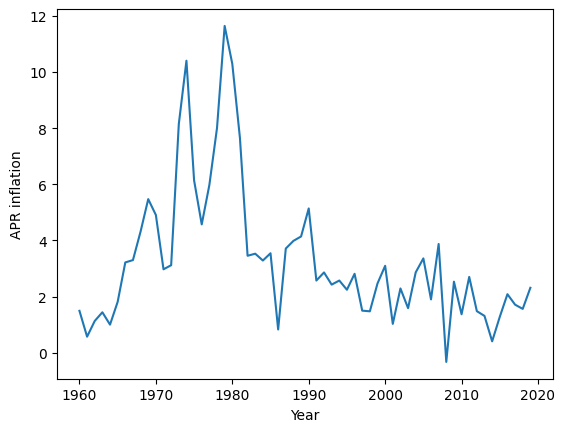

In [6]:
plt.plot(years, inflations)
plt.ylabel("APR inflation")
plt.xlabel("Year")
plt.show()

In [7]:
crimes = pd.read_csv('clean_Crime_rate_1960-2019.csv')


In [8]:
def convertToInt(arr):
  out = []
  for x in arr:
    # x = x[0:4]
    # print(x)
    converted = np.double(x)
    out.append(converted)
  return out

In [9]:
start = True
previous = 0
growth = []
year_growth = []

for x in crimes.values:
  y = x[0]
  p = x[1]
  year = np.int16(y)
  pop = np.double(p)
  if start:
    previous = pop
    start = False
    continue
  else:
    cur_growth = (pop - previous) / previous
    cur_growth *= 100
    growth.append(cur_growth)
    year_growth.append(year)
    previous = pop



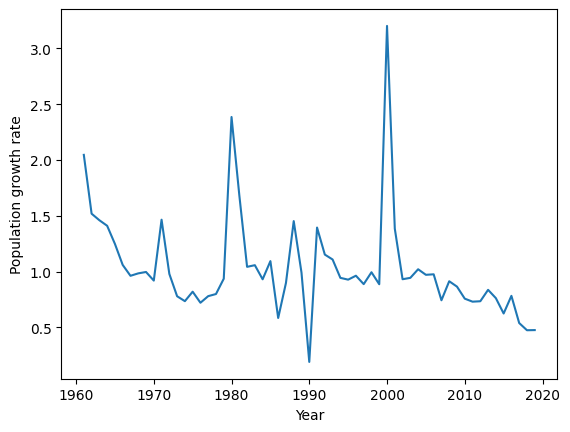

In [10]:
plt.plot(year_growth, growth)
plt.ylabel("Population growth rate")
plt.xlabel("Year")
plt.show()

In [11]:
def computeChange(data, years):
  start = True
  previous = 0
  growth = []
  year_growth = []

  for i in range(len(data)):
    cur = data[i]
    if start:
      previous = cur
      start = False
      continue
    else:
      year = years[i]
      cur_growth = (cur - previous) / previous
      cur_growth *= 100
      growth.append(cur_growth)
      year_growth.append(year)
      previous = pop

  return (growth, year_growth)

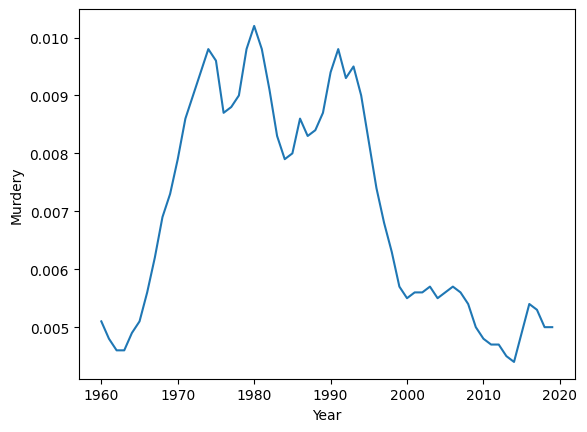

In [12]:
years_crime = crimes['Year\xa0']
murders = crimes['Murder\xa0']

mur = convertToInt(murders)
year_crime = convertToInt(years_crime)
#convert mur to np array
mur = np.array(mur)
year_crime = np.array(year_crime)
mur = (mur/100000)*100
plt.plot(year_crime, mur)
plt.ylabel("Murdery")
plt.xlabel("Year")
plt.show()

Correlation between murder and populaiton

In [13]:
mur_growth, mur_year = computeChange(mur, year_crime)

murr_corr = pd.Series(mur_growth)
pop_corr = pd.Series(growth)
murr_corr.corr(pop_corr)

0.2916850361008071

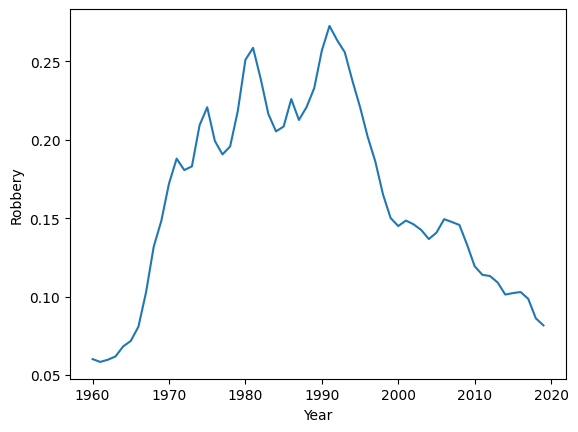

In [14]:
thefts = crimes['Robbery\xa0']
roberry = convertToInt(thefts)
roberry = (np.array(roberry)/100000)*100
plt.plot(year_crime, roberry)
plt.ylabel("Robbery")
plt.xlabel("Year")
plt.show()

In [15]:
roberry_growth, rob_year = computeChange(roberry, year_crime)

rob_corr = pd.Series(roberry_growth)
rob_corr.corr(pop_corr)

0.2916850362220492

In [16]:
murr_corr.corr(rob_corr)

0.9999999999999999

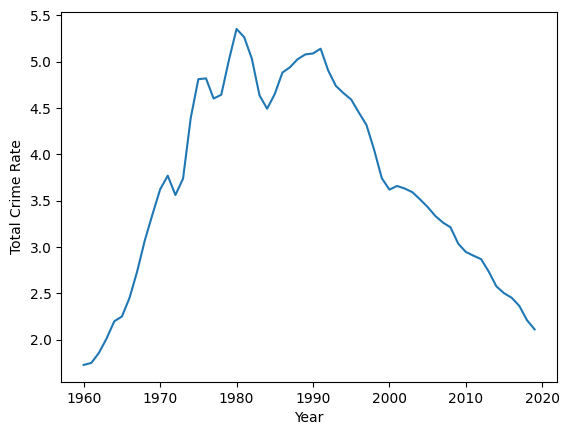

In [17]:
Y = crimes['Year\xa0']
years_ratio = convertToInt(Y)

population = []
total = []
for x in crimes.values:
  pop = x[3]
  tot = x[4]
  pop = pop.replace(",", "")
  tot = tot.replace(",", "")
  pop = np.double(pop)
  tot = np.double(tot)
  total.append(tot)
  population.append(pop)


for i in range(len(total)):
  popul = population[i]
  k = popul / 100000
  total_crimes = total[i] * k
  total[i] = total_crimes / popul
  total[i] *= 100
  # total[i] = total_crimes

# plt.plot(years_ratio, population)
plt.plot(years_ratio, total)
plt.xlabel("Year")
plt.ylabel("Total Crime Rate")
plt.show()

Correlation between population and ration of crime per the population

In [18]:
ratio_growth, Y_ratio_growth = computeChange(total, years_ratio)
ratio_corr = pd.Series(ratio_growth)

ratio_corr.corr(pop_corr)

0.29400123040260595

Correlation between the number of all crimes and population growth

In [19]:
total_correlated = pd.Series(total)
growth_correlated = pd.Series(growth)

total_correlated.corr(growth_correlated)

0.022726596152207183

Correlation between population growth and inflation

In [20]:
inflation_corr = pd.Series(inflations)
growth_corr = pd.Series(growth)

print(inflation_corr.corr(growth_corr))

0.18050563276974296


In [21]:
property = []
for x in crimes.values:
  prop = x[4]
  tot = np.double(tot)
  property.append(prop)
print(property)

['1726.3\xa0', '1747.9\xa0', '1857.5\xa0', '2012.1\xa0', '2197.5\xa0', '2248.8\xa0', '2450.9\xa0', '2736.5\xa0', '3071.8\xa0', '3351.3\xa0', '3621.0\xa0', '3768.8\xa0', '3560.4\xa0', '3737.0\xa0', '4389.3\xa0', '4810.7\xa0', '4819.5\xa0', '4601.7\xa0', '4642.5\xa0', '5016.6\xa0', '5353.3\xa0', '5263.8\xa0', '5032.5\xa0', '4637.3\xa0', '4492.1\xa0', '4650.5\xa0', '4881.8\xa0', '4940.3\xa0', '5027.1\xa0', '5077.9\xa0', '5088.5\xa0', '5139.7\xa0', '4902.7\xa0', '4737.7\xa0', '4660.0\xa0', '4591.3\xa0', '4451.0\xa0', '4316.3\xa0', '4049.1\xa0', '3743.6\xa0', '3618.3\xa0', '3658.1\xa0', '3630.6\xa0', '3591.20', '3514.1\xa0', '3431.5\xa0', '3334.5\xa0', '3263.5\xa0', '3211.5\xa0', '3036.1\xa0', '2945.90', '2905.40', '2868.00', '2733.30', '2574.10', '2500.50', '2451.60', '2362.90', '2209.8\xa0', '2109.9\xa0']


Index(['Year ', 'Population ', 'Total ', 'Violent ', 'Property ', 'Murder ',
       'Forcible Rape ', 'Robbery ', 'Aggravated assault ', 'Burglary ',
       'Larceny Theft ', 'Vehicle Theft '],
      dtype='object')


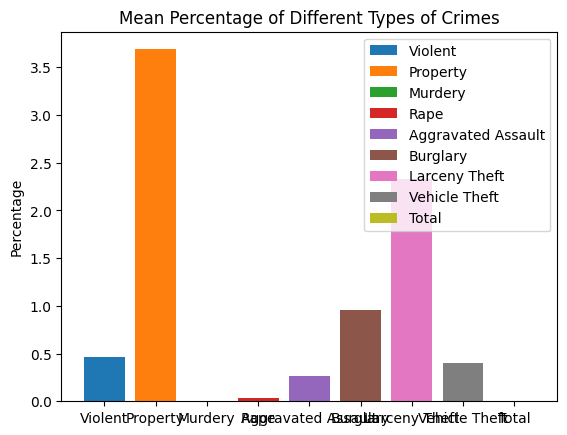

In [44]:
# bar chart of different types of crimes
print(crimes.columns)
violent = crimes['Violent\xa0']
prop = crimes['Property\xa0']
murr = crimes['Murder\xa0']
rape = crimes['Forcible Rape\xa0']
agg_assault = crimes['Aggravated assault\xa0']
burglary = crimes['Burglary\xa0']
larceny = crimes['Larceny Theft\xa0']
motor = crimes['Vehicle Theft\xa0']
total_bar = crimes['Total\xa0']

violent = convertToInt(violent)
prop = convertToInt(prop)
murr = convertToInt(murr)
rape = convertToInt(rape)
agg_assault = convertToInt(agg_assault)
burglary = convertToInt(burglary)
larceny = convertToInt(larceny)
motor = convertToInt(motor)
total_bar = convertToInt(total_bar)

violent = (np.mean(np.array(violent))/100000)*100
prop = (np.mean(np.array(prop))/100000)*100
murr = (np.mean(np.array(murr))/100000)*100
rape = (np.mean(np.array(rape))/100000)*100
agg_assault = (np.mean(np.array(agg_assault))/100000)*100
burglary = (np.mean(np.array(burglary))/100000)*100
larceny = (np.mean(np.array(larceny))/100000)*100
motor = (np.mean(np.array(motor))/100000)*100
total_bar = (np.mean(np.array(total))/100000)*100

#bar chart of different types of crimes
plt.bar(['Violent'], violent, label="Violent")
plt.bar(['Property'], prop, label="Property")
plt.bar(['Murdery'], murr, label='Murdery')
plt.bar(['Rape'], rape, label="Rape")
plt.bar(['Aggravated Assault'], agg_assault, label="Aggravated Assault")
plt.bar(['Burglary'], burglary, label="Burglary")
plt.bar(['Larceny Theft'], larceny, label="Larceny Theft")
plt.bar(['Vehicle Theft'], motor, label="Vehicle Theft")
plt.bar(['Total'], total_bar, label="Total")

plt.ylabel('Percentage')
plt.title('Mean Percentage of Different Types of Crimes')
plt.legend()

plt.show()


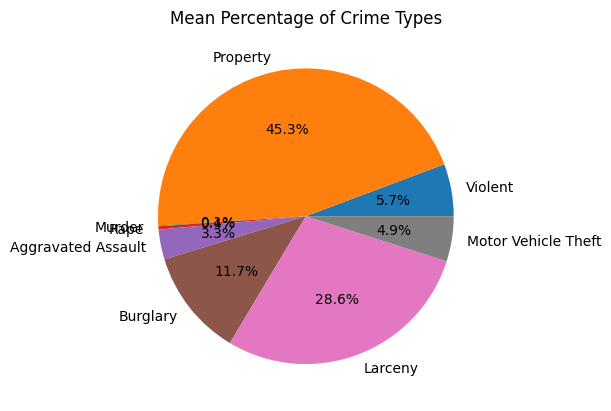

In [23]:
# Data for the pie chart
crime_data = [violent, prop, murr, rape, agg_assault, burglary, larceny, motor]
crime_labels = ['Violent', 'Property', 'Murder', 'Rape', 'Aggravated Assault', 'Burglary', 'Larceny', 'Motor Vehicle Theft']

# Create the pie chart
plt.pie(crime_data, labels=crime_labels, autopct='%1.1f%%')
plt.title('Mean Percentage of Crime Types')
plt.show()

In [24]:
import scipy.stats as reg
res = reg.linregress(inflations[1:], growth)
res.slope

0.01255823726591809

Regression for the entire dataset

5.299865677365485


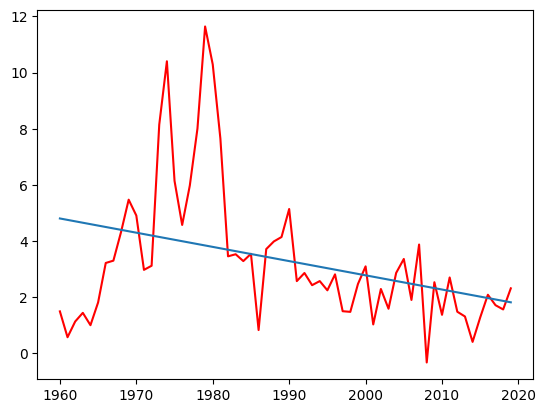

In [25]:
degree = 1
regression1 = np.polyfit(years, inflations, degree)
model1 = np.poly1d(regression1)

mse1_sum = 0
for infl, x in zip(inflations, years):
    prediction = model1(x)
    mse1_sum += (infl - prediction)**2
mse1 = mse1_sum / len(inflations)
print(mse1)

plt.plot(years, inflations, c='red')
plt.plot(years, model1(years))
plt.show()

Regression based on the last twenty years

0.8909909447016451


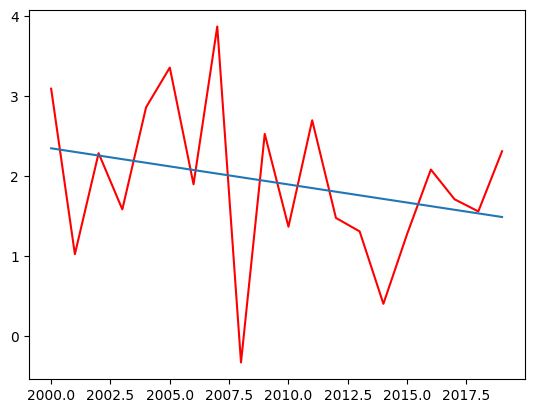

In [26]:
regression2 = np.polyfit(years[-20:], inflations[-20:], degree)
model2 = np.poly1d(regression2)

mse2_sum = 0
for infl, x in zip(inflations[-20:], years[-20:]):
    prediction = model2(x)
    mse2_sum += (infl - prediction)**2
mse2 = mse2_sum / 20
print(mse2)

plt.plot(years[-20:], inflations[-20:], c='red')
plt.plot(years[-20:], model2(years[-20:]))
plt.show()

Extracting extra data for the inflation set

In [27]:
current = ''
extra_years = []
extra_inflation = []
extra_buffer = []
not_found = True
prev = 0.0

for x in monthly_inflation_rates.values:
  date = x[0]
  date = date[:4]
  if not_found:
    if date[:4] == '2020':
      current = '2020'
      prev = x[1]
      not_found = False
      extra_years.append(current)
  else:
    if date == current:
      c = x[1]
      infl = (c - prev) / prev
      extra_buffer.append(infl)
      prev = c
    else:
      current = date
      arr = np.array(extra_buffer)
      sum = arr.sum()
      sum *= 100
      extra_buffer = []
      extra_inflation.append(sum)
      extra_years.append(current)

arr = np.array(extra_buffer)
sum = arr.sum()
sum*=200
extra_inflation.append(sum)

In [28]:
extra_years = convertToInt(extra_years)

12.975475525210348


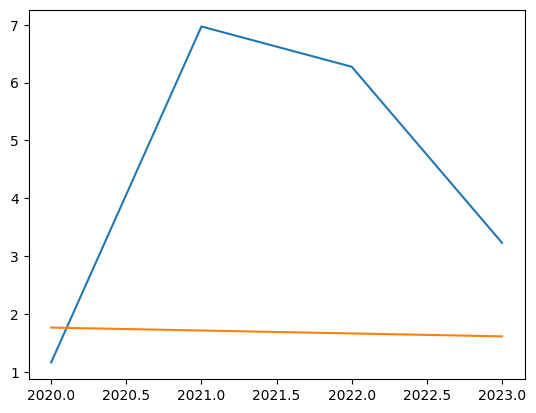

In [29]:
mse_extra1 = 0
for infl, x in zip(extra_inflation, extra_years):
    prediction = model1(x)
    mse_extra1 += (infl - prediction)**2
mseExtra1 = mse_extra1 / len(extra_inflation)
print(mseExtra1)


plt.plot(extra_years, extra_inflation)
plt.plot(extra_years, model1(extra_years))
plt.show()

14.754617948731234


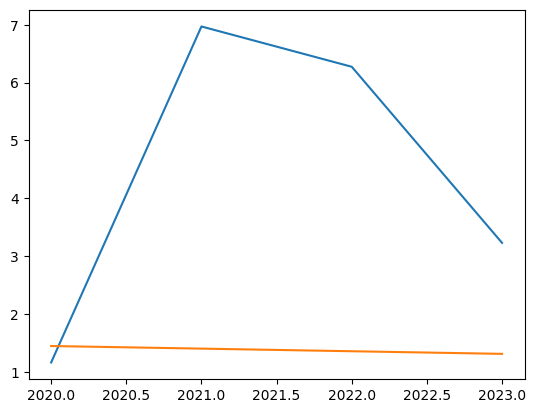

In [30]:
mse_extra2 = 0
for infl, x in zip(extra_inflation, extra_years):
    prediction = model2(x)
    mse_extra2 += (infl - prediction)**2
mseExtra2 = mse_extra2 / len(extra_inflation)
print(mseExtra2)

plt.plot(extra_years, extra_inflation)
plt.plot(extra_years, model2(extra_years))
plt.show()

Correlation between population growth and inflation with graph

Correlation between population growth and inflation is 0.21934441362425117


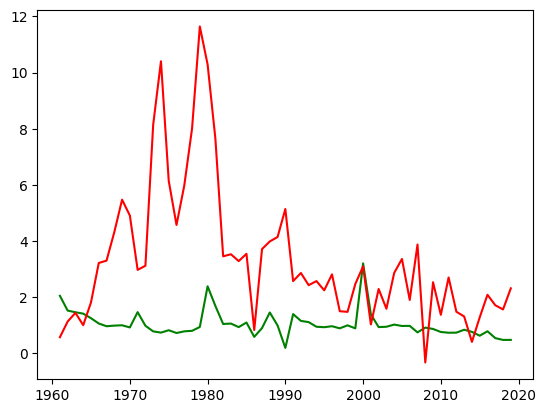

In [31]:
print("Correlation between population growth and inflation is " + str(growth_corr.corr(inflation_corr[1:])))

plt.plot(years[1:], growth, c='green')
plt.plot(years[1:], inflations[1:], c='red')
plt.show()

Estimating inflation based on population growth

Mean squared error is 6.08668423103339


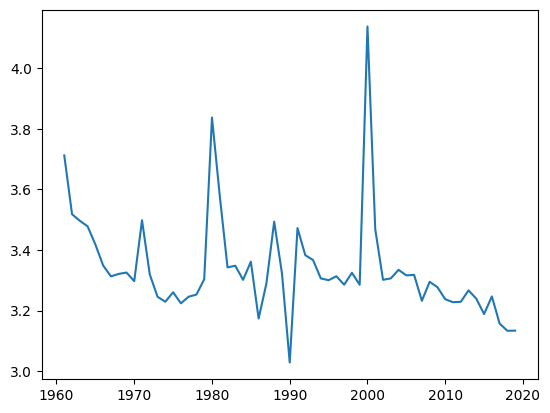

In [32]:
b, a = np.polyfit(growth, inflations[1:], 1)

estimated_infl = []
for x in growth:
  res = a + b*x
  estimated_infl.append(res)

# estimation error
mse_estim_sum = 0
for i in range(len(estimated_infl)):
   mse_estim_sum += (inflations[i+1] - estimated_infl[i])**2
mse_estim = mse_estim_sum / len(estimated_infl)
print("Mean squared error is "+ str(mse_estim))

plt.plot(years[1:], estimated_infl)
plt.show()

Predicting population growth for the next 20 years and predict inflation rate based on predicted populaiton growth

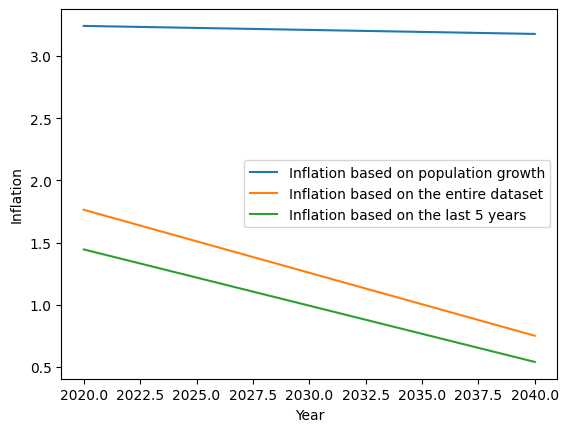

In [33]:
reg_growth = np.polyfit(years[1:], growth, 1)
model_growth = np.poly1d(reg_growth)

years_growth = []
predicted_inflation = []
for i in range(21):
  y = 2020 + i
  years_growth.append(y)
  predicted = model_growth(y)
  infl = a + b * predicted
  predicted_inflation.append(infl)

plt.plot(years_growth, predicted_inflation)
plt.plot(years_growth, model1(years_growth))
plt.plot(years_growth, model2(years_growth))
plt.legend(['Inflation based on population growth', 'Inflation based on the entire dataset','Inflation based on the last 5 years'])
plt.ylabel("Inflation")
plt.xlabel("Year")
plt.show()

Comparing the predicted inflation with a true values based on population growth

MSE for the predicted inflation based on the predicted growth rate is 6.874279431121558


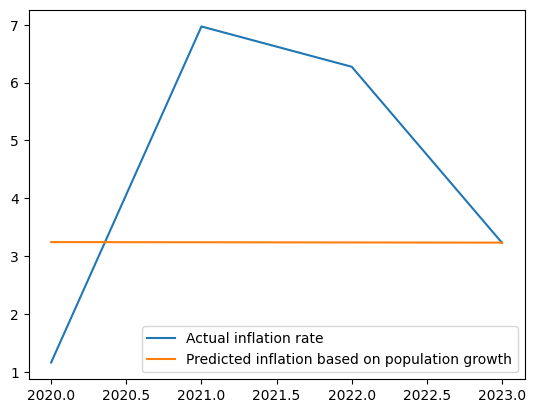

In [34]:
mse_sum = 0
for i in range(len(extra_inflation)):
  mse_sum += (extra_inflation[i] - predicted_inflation[i])**2
mse_sum /= len(extra_inflation)
print("MSE for the predicted inflation based on the predicted growth rate is " + str(mse_sum))


plt.plot(extra_years, extra_inflation)
plt.plot(extra_years, predicted_inflation[:4])
plt.legend(['Actual inflation rate', 'Predicted inflation based on population growth'])
plt.show()


The MSE of the prediction is 0.18659922391795972


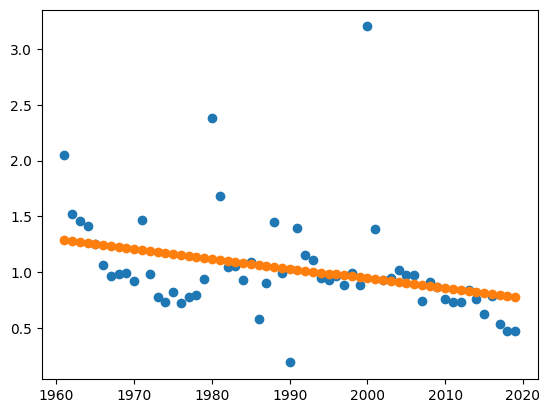

In [35]:
population_regression_growth = np.polyfit(years[1:], growth_correlated, 1)
population_model = np.poly1d(population_regression_growth)
predicted_population = population_model(years[1:])

pop_mse = 0
for i in range(len(predicted_population)):
  pop_mse += (growth_correlated[i] - predicted_population[i])**2
pop_mse /= len(predicted_population)
print("The MSE of the prediction is " + str(pop_mse))


plt.scatter(years[1:], growth_correlated)
plt.scatter(years[1:], predicted_population)
plt.show()

Predicting population growth up to 2050

Text(0.5, 0, 'Years')

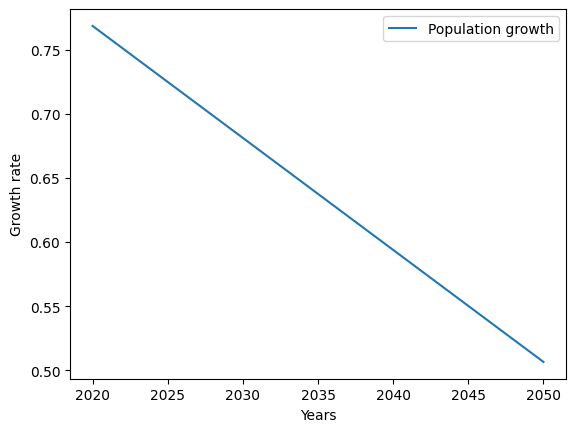

In [36]:
population_extra_years = []
population_extra_data = []

for i in range(31):
  y = 2020 + i
  predicted = population_model(y)
  population_extra_years.append(y)
  population_extra_data.append(predicted)

plt.plot(population_extra_years, population_extra_data)
plt.legend(["Population growth"])
plt.ylabel("Growth rate")
plt.xlabel("Years")


The MSE of the prediction is 1.1219134792204992


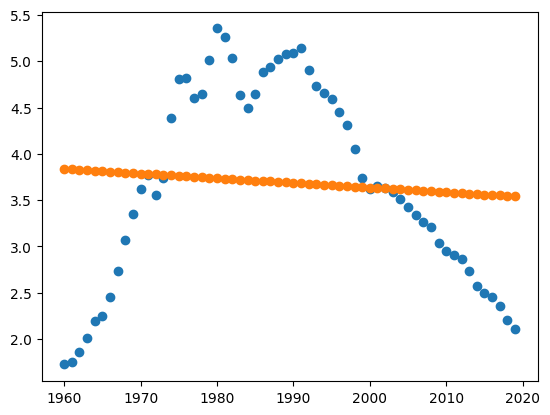

In [37]:
total_regression = np.polyfit(years, total_correlated, 1)
total_model = np.poly1d(total_regression)
predicted_total = total_model(years)

total_mse = 0
for i in range(len(predicted_total)):
  total_mse += (total_correlated[i] - predicted_total[i])**2
total_mse /= len(predicted_total)
print("The MSE of the prediction is " + str(total_mse))


plt.scatter(years, total_correlated)
plt.scatter(years, predicted_total)
plt.show()

The MSE of predicting the ratio of crimes over bases on population growth is 1.0805405027475627


Text(0, 0.5, 'Ratio')

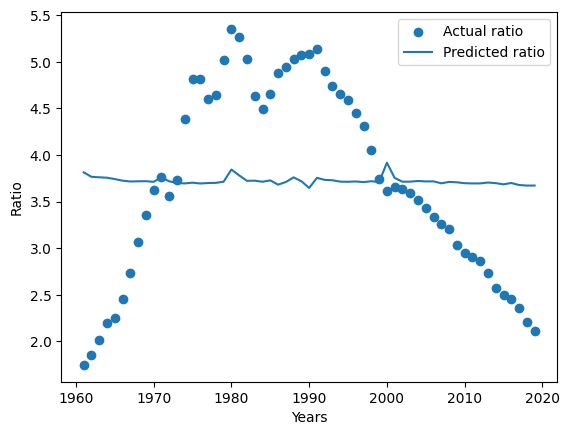

In [38]:
b, a = np.polyfit(growth_correlated, total_correlated[1:], 1)
estimated_total = []
for x in growth_correlated:
  res = a + b*x
  estimated_total.append(res)

mse_estimated_total = 0
for i in range(len(estimated_total)):
  mse_estimated_total += (total_correlated[1+i] - estimated_total[i])**2
mse_estimated_total /= len(estimated_total)
print("The MSE of predicting the ratio of crimes over bases on population growth is " + str(mse_estimated_total))

plt.scatter(years[1:], total_correlated[1:])
plt.plot(years[1:], estimated_total)
plt.legend(["Actual ratio", "Predicted ratio"])
plt.xlabel('Years')
plt.ylabel("Ratio")

Comparing between predictions based on actual ratio data and based on the popualtion growth

Text(0, 0.5, 'Crime ratio')

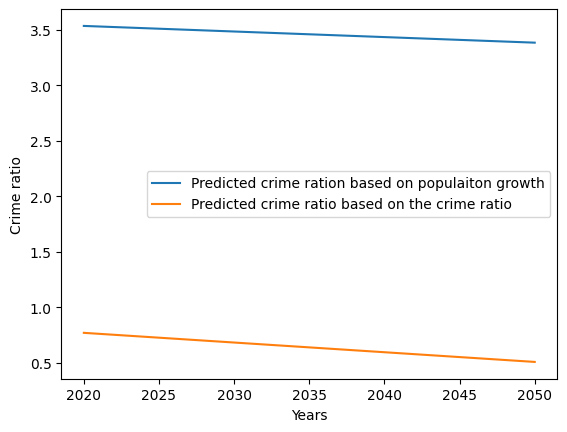

In [39]:
total_population_years = []
extra_total = []
extra_population = []
for i in range(31):
  y = 2020 + i
  total_population_years.append(y)
  extra_total.append(total_model(y))
  extra_population.append(population_model(y))

plt.plot(total_population_years, extra_total)
plt.plot(total_population_years, extra_population)
plt.legend(["Predicted crime ration based on populaiton growth", "Predicted crime ratio based on the crime ratio"])
plt.xlabel("Years")
plt.ylabel("Crime ratio")

Looking for the correlation between crime ratio and inflation

Mean squared error is 17.066959954748434


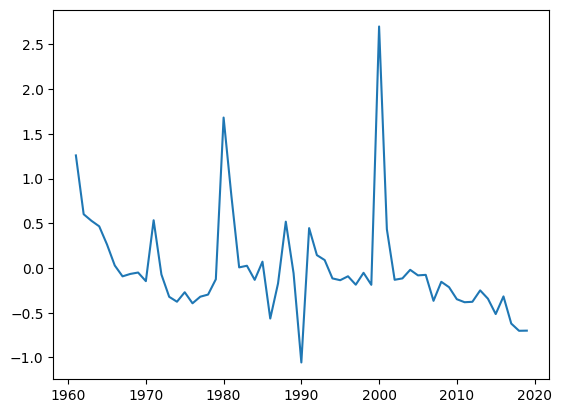

In [40]:
b, a = np.polyfit(total_correlated, inflations, 1)

estimated_infl_total = []
for x in growth:
  res = a + b*x
  estimated_infl_total.append(res)

# estimation error
mse_estim_sum = 0
for i in range(len(estimated_infl_total)):
   mse_estim_sum += (inflations[i] - estimated_infl_total[i])**2
mse_estim = mse_estim_sum / len(estimated_infl_total)
print("Mean squared error is "+ str(mse_estim))

plt.plot(years[1:], estimated_infl_total)
plt.show()

Computing linear regression based on a new correlation

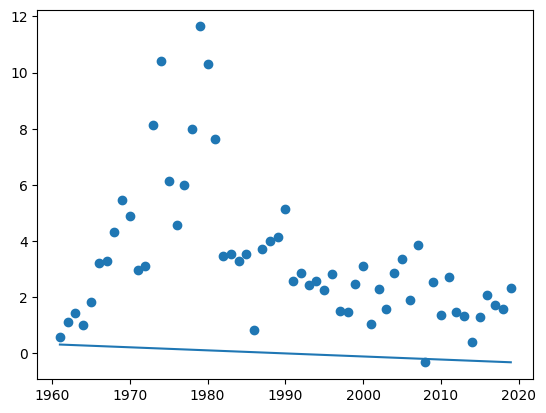

In [41]:
corReg = np.polyfit(years[1:], estimated_infl_total, 1)
corModel = np.poly1d(corReg)

plt.scatter(years[1:], inflations[1:])
plt.plot(years[1:], corModel(years[1:]))
plt.show()


MSE for the predicted inflation based on the predicted crime ratio is 28.155788200013934


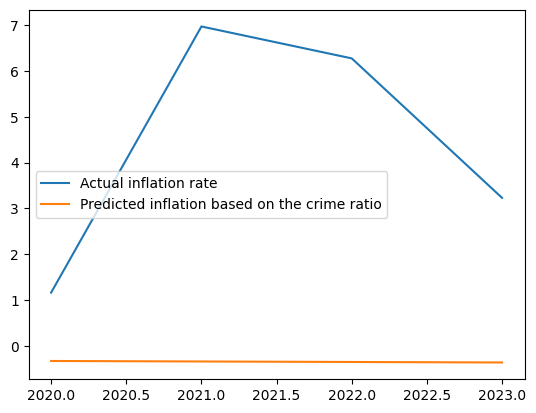

In [42]:
predicted_inflation1 = []
for y in extra_years:
  predicted_inflation1.append(corModel(y))


mse = 0
for i in range(len(extra_inflation)):
  mse += (extra_inflation[i] - predicted_inflation1[i])**2
mse /= len(extra_inflation)
print("MSE for the predicted inflation based on the predicted crime ratio is " + str(mse))


plt.plot(extra_years, extra_inflation)
plt.plot(extra_years, predicted_inflation1[:4])
plt.legend(['Actual inflation rate', 'Predicted inflation based on the crime ratio'])
plt.show()

Compute correlation between each type of crime and inflation rate

In [50]:
violent = crimes['Violent\xa0']
prop = crimes['Property\xa0']
murr = crimes['Murder\xa0']
rape = crimes['Forcible Rape\xa0']
agg_assault = crimes['Aggravated assault\xa0']
burglary = crimes['Burglary\xa0']
larceny = crimes['Larceny Theft\xa0']
motor = crimes['Vehicle Theft\xa0']
total_bar = crimes['Total\xa0']

violent = convertToInt(violent)
prop = convertToInt(prop)
murr = convertToInt(murr)
rape = convertToInt(rape)
agg_assault = convertToInt(agg_assault)
burglary = convertToInt(burglary)
larceny = convertToInt(larceny)
motor = convertToInt(motor)
total_bar = convertToInt(total_bar)

all_crimes = [violent, prop, murr, rape, agg_assault, burglary, larceny, motor, total_bar]
crimes_names = ["Violence", 'Property', 'Murder', "Forcible rape", "Aggravated assault", 'Burglary', "Larceny Theft ", "Vehicle Theft", "Total"]
crimes_correlation = {}
for i in range(len(all_crimes)):
  c = pd.Series(all_crimes[i])
  res = inflation_corr.corr(c)
  crimes_correlation[crimes_names[i]] = res

In [51]:
print(crimes_correlation)

{'Violence': 0.23489521420780002, 'Property': 0.5378954071618349, 'Murder': 0.6921460817405756, 'Forcible rape': 0.105952277170923, 'Aggravated assault': 0.04002064437030826, 'Burglary': 0.720606378566271, 'Larceny Theft ': 0.40513629453885525, 'Vehicle Theft': 0.4230773217070863, 'Total': 0.5072768197562532}


We can see that several types of crimes have a high level of correlation with the inflation rate growth. They are murder and burglary. There are some more crimes with correlation of 50%, but it's lower than 69.2% and 72% respectively. Also, there is one type of crime that doesnt have any correlation - aggrevated assult with correlation coefficient of 0.04.
We are curios to see the difference of predicting inflation based on higly correlated dataset and weakly correlating by comparing their MSE.

Mean squared error is 2.917513172159645


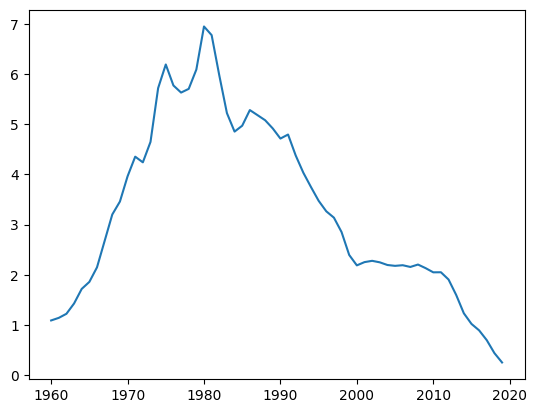

In [54]:
# correlation on higly correlated
b, a = np.polyfit(burglary, inflations, 1)

estimated_infl_burglary = []
for x in burglary:
  res = a + b*x
  estimated_infl_burglary.append(res)

# estimation error
mse_estim_burglary_sum = 0
for i in range(len(estimated_infl_burglary)):
   mse_estim_burglary_sum += (inflations[i] - estimated_infl_burglary[i])**2
mse_estim_burglary_sum /= len(estimated_infl_burglary)
print("Mean squared error is "+ str(mse_estim_burglary_sum))

plt.plot(years, estimated_infl_burglary)
plt.show()

Mean squared error is 5.403222222682449


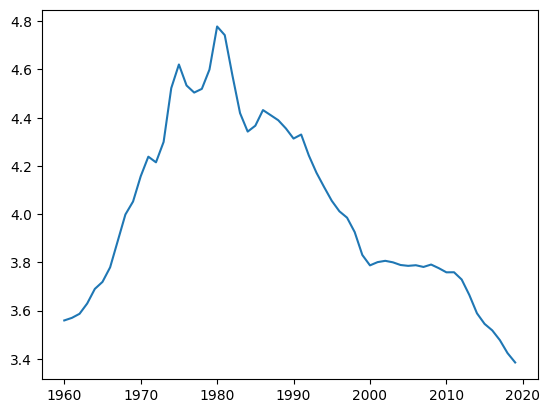

In [55]:
# computing inflation on weakly correlated
b, a = np.polyfit(agg_assault, inflations, 1)

estimated_infl_agg_assault = []
for x in burglary:
  res = a + b*x
  estimated_infl_agg_assault.append(res)

# estimation error
mse_estim_agg_assault_sum = 0
for i in range(len(estimated_infl_agg_assault)):
   mse_estim_agg_assault_sum += (inflations[i] - estimated_infl_agg_assault[i])**2
mse_estim_agg_assault_sum /= len(estimated_infl_agg_assault)
print("Mean squared error is "+ str(mse_estim_agg_assault_sum))

plt.plot(years, estimated_infl_agg_assault)
plt.show()

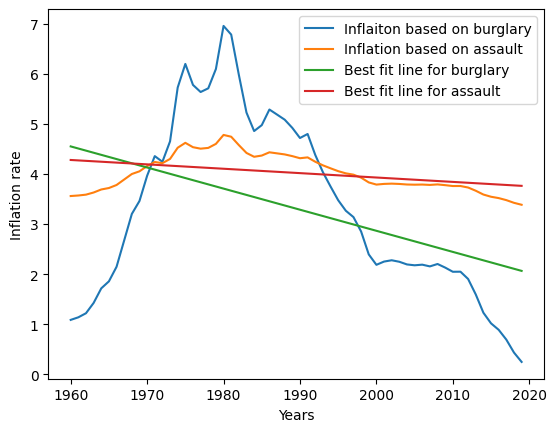

In [58]:
# Taking regression on both results
regBurglary = np.polyfit(years, estimated_infl_burglary, 1)
modelBurglary = np.poly1d(regBurglary)

regAssault = np.polyfit(years, estimated_infl_agg_assault, 1)
modelAssault = np.poly1d(regAssault)

plt.plot(years, estimated_infl_burglary)
plt.plot(years, estimated_infl_agg_assault)
plt.plot(years, modelBurglary(years))
plt.plot(years, modelAssault(years))
plt.legend(['Inflaiton based on burglary', 'Inflation based on assault', 'Best fit line for burglary', 'Best fit line for assault'])
plt.xlabel("Years")
plt.ylabel("Inflation rate")
plt.show()

Predicting inflation

MSE for the predicted inflation based on the burglary is 11.547216645221843
MSE for the predicted inflation based on the assault is 5.95627868769707


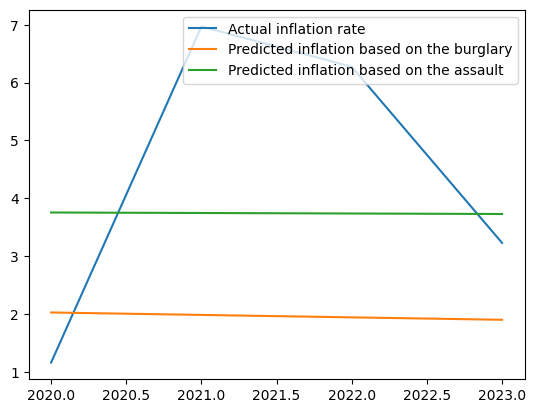

In [61]:
predicted_inflation_burglary = []
predicted_inflation_assault = []
for y in extra_years:
  predicted_inflation_burglary.append(modelBurglary(y))
  predicted_inflation_assault.append(modelAssault(y))

mseBul = 0
mseAssault = 0
for i in range(len(extra_inflation)):
  mseBul += (extra_inflation[i] - predicted_inflation_burglary[i])**2
  mseAssault += (extra_inflation[i] - predicted_inflation_assault[i])**2
mseBul /= len(extra_inflation)
mseAssault /= len(extra_inflation)
print("MSE for the predicted inflation based on the burglary is " + str(mseBul))
print("MSE for the predicted inflation based on the assault is " + str(mseAssault))



plt.plot(extra_years, extra_inflation)
plt.plot(extra_years, predicted_inflation_burglary)
plt.plot(extra_years, predicted_inflation_assault)
plt.legend(['Actual inflation rate', 'Predicted inflation based on the burglary', 'Predicted inflation based on the assault'])
plt.show()

We can see, that even though burglary has much better MSE for the entire dataset than assault, it wasn't able to score the better mse for the time period from 2020-2023. It's easy to explain. First of all, the time period of 2020-2023 is full of events that do not occur usually. It is pandemic of COVID-19 and war in Ukraine. These events were the main reason why inflation rate got so high.
As bulgary is a better fit for the dataset, it was expecting inflation rate to go down or stay at almost the same level. However, since the events I described above significantly increased the inflation rate, burglary wasn't able to predict. And what's about assault, it was getting worse result of MSE as it was overestimating the inflation rate. However, its overestimating results were able to score better result of MSE when the inflation raised.